In [9]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

In [10]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [12]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/15
422/422 [==============================] - 45s 107ms/step - loss: 0.3554 - accuracy: 0.8921 - val_loss: 0.0856 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 46s 109ms/step - loss: 0.1114 - accuracy: 0.9665 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0824 - accuracy: 0.9744 - val_loss: 0.0530 - val_accuracy: 0.9842
Epoch 4/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.0393 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.0353 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0509 - accuracy: 0.9834 - val_loss: 0.0326 - val_ac

In [13]:
def recognize_number(input_image):
    digit_images = np.split(input_image, input_image.shape[1] / 28, axis=1)
    digit_images = np.array(digit_images)
    prediction_result = model.predict(digit_images)
    ans = ""
    for case in np.split(prediction_result, len(digit_images)):
        predicted = np.argmax(case)
        ans += str(predicted)

    print("Предсказанное число:", ans)


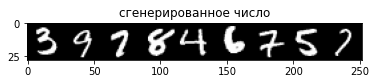

1/1 [==============================] - 0s 56ms/step
Предсказанное число: 397846757


In [14]:
def generate_input_image(possible_digits=x_test,
                         input_length=1):
    selected_digit_images = [possible_digits[random.randint(0, len(possible_digits))] for _ in range(input_length)]
    concatenated = np.concatenate(selected_digit_images, axis=1).squeeze()
    plt.title('сгенерированное число')
    plt.imshow(concatenated, cmap='gray')
    plt.show()
    return concatenated

input_image = generate_input_image(input_length=9)

recognize_number(input_image)